In [1]:
from transformers import AutoTokenizer

/shared/rsaas/michal5/anaconda3/envs/lavis_cuda10/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [3]:
sentence_1 = 'mug in the grass'
encode_1 = tokenizer.encode(sentence_1)
print(encode_1)

[101, 14757, 1999, 1996, 5568, 102]


In [6]:
sentence_2 = 'grass in the mug'
encode_2 = tokenizer.encode(sentence_2)
print(encode_2)

[101, 5282, 1107, 1103, 15761, 102]


In [3]:
import json 
with open('/data/common/coco/annotations/captions_train2017.json') as f:
    all_captions_and_images = json.load(f)
imgs_to_caption  = {}


In [12]:
print(all_captions_and_images.keys())

dict_keys(['info', 'licenses', 'images', 'annotations'])


In [4]:
all_captions = []

In [5]:
for entry in all_captions_and_images['annotations']:
    if entry['image_id'] not in imgs_to_caption:
        imgs_to_caption[entry['image_id']] = entry['caption']
        all_captions.append(entry['caption'])

In [6]:
caption_to_imgs = {}
for entry in imgs_to_caption:
    caption_to_imgs[imgs_to_caption[entry]] = entry

In [7]:
caption_to_token = {}
for entry in imgs_to_caption:
    caption_to_token[imgs_to_caption[entry]] = set(tokenizer.encode(imgs_to_caption[entry])) 

In [8]:
token_to_caption = {}
for entry in caption_to_token:
    token_to_caption[tuple(caption_to_token[entry])] = entry

In [22]:
print(all_captions[1],all_captions[64702])

A room with blue walls and a white sink and door. A four way stop sign under a Sonoma road sign. 


In [10]:
print(len(all_captions))

118287


In [9]:


batch_encode = tokenizer(all_captions,padding=True,truncation=True)

In [64]:
print(len(all_captions))

118287


In [ ]:
token_id_to_token= {}


In [57]:
print(batch_encode[0])

Encoding(num_tokens=60, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


In [31]:
print(max(len(k) for k in list(caption_to_token.values())))

45


In [52]:
y = list(k for k in batch_encode)

In [63]:
print(len(caption_to_token.values()))

114054


In [17]:
print(batch_encode[0].ids)

[101, 1037, 10165, 15059, 2007, 1037, 5119, 2004, 1996, 2392, 5217, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
token_input_ids_to_ids = {}
all_ids = []
token_input_ids_to_tokens = {}
for i,input_ids in enumerate(batch_encode.input_ids):
    token_input_ids_to_ids[tuple(input_ids)] = i
    all_ids.append(i)
    token_input_ids_to_tokens[tuple(input_ids)] = batch_encode[i].tokens

In [11]:
import faiss 
import numpy as np
d = 60
all_tokens = [np.array(k) for k in batch_encode.input_ids]


In [13]:
print(len(all_tokens))

118287


In [12]:
all_ids = np.array(all_ids)
all_tokens = np.array(all_tokens).astype('float32')

In [25]:
faiss.normalize_L2(all_tokens)

In [13]:
index = faiss.IndexFlatL2(59)
index = faiss.IndexIDMap(index)
index.add_with_ids(all_tokens,all_ids)

In [14]:
sims, sim_ids = index.search(all_tokens,k=21)

In [25]:
print(sim_ids[14416],sim_ids[1])

[ 14416      1  85633  29062  67322  58437 104138  33107  70546  97418
  58075  63844 104946 102391  65510 109694  93870 102255  95244  81022
   4653] [     1  14416  38363  67322  58437  64702  70546  85633  23505 102255
  81102  58075  65510 116474 116060  38747  29062   3584   4913  38312
  45576]


In [17]:
print(all_tokens[14416])

[ 101. 1037. 2177. 1997. 2111. 3564. 2012. 2048. 2146. 7251. 1999. 2282.
 1012.  102.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


In [18]:
new_14416 = [int(k) for k in all_tokens[14416]]

In [19]:
print( token_input_ids_to_tokens[tuple(new_14416)])

['[CLS]', 'a', 'group', 'of', 'people', 'sitting', 'at', 'two', 'long', 'tables', 'in', 'room', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [20]:
print(all_captions[14416])

A group of people sitting at two long tables in room.


In [26]:
print(caption_to_imgs[all_captions[14416]])

136644


In [38]:
! ls /data/common/coco/images/train2017/000000136644.jpg

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/data/common/coco/images/train2017/000000136644.jpg


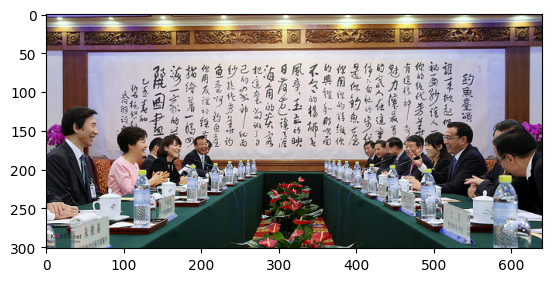

In [39]:
import matplotlib.pyplot as plt 
from PIL import Image
im = Image.open('/data/common/coco/images/train2017/000000136644.jpg')
plt.imshow(im)

In [23]:
new_1 = [int(k) for k in all_tokens[1]]
print(token_input_ids_to_tokens[tuple(new_1)])
print(all_captions[1])

['[CLS]', 'a', 'room', 'with', 'blue', 'walls', 'and', 'a', 'white', 'sink', 'and', 'door', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
A room with blue walls and a white sink and door.


In [31]:
print(token_input_ids_to_ids[tuple(all_tokens[1,:])])

KeyError: (0.00955111, 0.09806436, 0.21579833, 0.18979284, 0.2487071, 0.3480954, 0.18894175, 0.09806436, 0.21910812, 0.73307127, 0.18894175, 0.2213777, 0.09570023, 0.009645674, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [34]:
import numpy as np 
x = np.array([1,2,3,4,5,6])
x.argsort()[::-1][:2]

array([5, 4])

In [15]:
new_ids = 0
new_coco_annotations = []
#need image id, example id (generate), question (the same for similar ones), answer (yes or no)
#for unsimilar ones just need image id 
#annotations added to images 
for i,entry in enumerate(sim_ids):
    correct_caption =all_captions[i]
    correct_image = caption_to_imgs[correct_caption]
    question = f'Is this a photo of a {correct_caption}'
    correct_new_entry = {'image_id':correct_image,'id':new_ids,'question':question,'answer':'yes'}
    new_ids += 1
    new_coco_annotations.append(correct_new_entry)
    incorrect_options = sim_ids[i][1:]
    chosen_incorrect = np.random.choice(incorrect_options,size=1,replace=False)
    incorrect_image_options = []
    for token_entry in chosen_incorrect:
        corresponding_caption = all_captions[token_entry]
        corresponding_image = caption_to_imgs[corresponding_caption]
        incorrect_image_options.append(corresponding_image)
    for img_id in incorrect_image_options:
        incorrect_new_entry = {'image_id':img_id,'id':new_ids,'question':question,'answer':'no'}
        new_coco_annotations.append(incorrect_new_entry)
        new_ids+= 1

In [16]:
new_dict = {'annotations':new_coco_annotations,'images':all_captions_and_images['images']}

In [55]:
print(len(new_dict['annotations']))

709722


In [17]:
with open('/shared/rsaas/michal5/LAVIS/contrast_caption_small.json','w+') as f:
    json.dump(new_dict,f,indent=1)

In [35]:
caption_to_top_20 = {}
caption_to_caption = {}
from tqdm import tqdm
import numpy as np
for entry_1 in tqdm(list(caption_to_token.keys())):
    set_values = []
    highest_token = []
    for entry_2 in tqdm(list(caption_to_token.keys())):
         min_val = min(set_values)
        if entry_1 != entry_2:
            val = caption_to_token[entry_1].intersection(caption_to_token[entry_2])
            if len(set_values)<20:  
                set_values.append(len(val))
                highest_token.append(entry_2)
            elif len(val) >min_val:
                set_values.append(len(val))
                highest_token.append(entry_2)
                
    set_values = np.array(set_values)
    highest_token = np.array(highest_token)
    caps_to_save = highest_token[set_values.argsort()[::-1][:20]]
    caps_to_save = caps_to_save.tolist()
    caption_to_top_20[entry_1] = caps_to_save
    with open('/shared/rsaas/michal5/LAVIS/sim_captions.json') as f:
        json.dump(caption_to_top_20)
    
    
    #caption_to_caption[entry_1] =token_to_caption[tuple(highest_token)]
                
                
            

100%|██████████████████████████████| 114054/114054 [00:00<00:00, 1012052.87it/s]


100%|███████████████████████████████| 114054/114054 [00:00<00:00, 959054.11it/s]


  0%|                                    | 199/114054 [00:42<6:08:22,  5.15it/s]


  0%|                                                | 0/114054 [00:00<?, ?it/s]


  0%|                                    | 336/114054 [01:10<6:34:54,  4.80it/s]


  0%|▏                                   | 405/114054 [01:25<7:31:41,  4.19it/s]


  0%|                                                | 0/114054 [00:00<?, ?it/s]


  0%|▏                                   | 539/114054 [01:54<6:02:55,  5.21it/s]


100%|██████████████████████████████| 114054/114054 [00:00<00:00, 1019839.53it/s]


  0%|                                                | 0/114054 [00:00<?, ?it/s]


  1%|▏                                   | 678/114054 [02:22<6:36:18,  4.77it/s]


KeyboardInterrupt: 

In [ ]:
#make huge matrix  of cap by cap and compute cosine similarity 